Caracteristicas:  
id = id  
marca = brand  
modelo = model  
ano = year  
quilometragem = miles  **--> 1 milha(miles) = 1.60934 quilometros (km)**  
consumo na cidade = city_mileage  **--> 1 MPG ~= 0.425 km/L** -- ex: 25 MPG x 0.425 = 10,63 km/L  
consumo na rodovia = highway_mileage  **--> 1 MPG ~= 0.425 km/L**  
potência = horsepower  **--> HP ~= 0.986 cv --> 1 cv ~= 1.0139 HP**  
torque = torque  
capacidade do motor em litro = engine_capacity_litre  **--> Lê se motor 1.0 ou motor 1.5 etc**  
capacidade do combustivel = fuel_capacity  **--> Medida Americana = Galão = 1 galão = 3.785 litros**  
número de cilindros = num_cylinder  
número de assentos = num_seat  
número de proprietários = num_owners  
preço = price  
link = link  
condição = condition  
tipo = type  
número de portas = door  
tração nas rodas = wheel_drive    
tipo de motor = engine_type    
Câmbio do veiculo = speed_levels  
altura livre dianteira = front_headroom   **--> 1 polegada = 2.54 cm**  
espaço para pernas dinateiro = front_legroom  **--> 1 polegada = 2.54 cm**  
altura livre traseira = rear_headroom  **--> 1 polegada = 2.54 cm**  
espaço para pernas traseiro = rear_legroom  **--> 1 polegada = 2.54 cm**  
registros de manutenção/serviços =  service_records

### Vamos realizar as análises iniciais dos dados brutos da empresas autotrader e carfax, Faremos inicialmente análises estatística descritivas e exploratória de todas as variáveis do modelo.

In [1]:
# Importe das libs
import pandas as pd
import numpy as np
import scipy as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_cars = pd.read_csv('cars.csv', sep=',')

In [3]:
# Criando um copia dos dados original para preservá-los
df_cars_copia = df_cars.copy()
df_cars_copia

,id,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,...,type,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
0,3,Chevrolet,Volt LT,2019,27173,43,42,149,294,1.5,...,sedan,4,2,hybrid_gas_electric,6.0,37.8,42.1,35.8,34.7,4
1,6,Hyundai,Elantra SE,2017,76941,29,38,146,132,2.0,...,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,16
2,7,Ford,Focus,2014,97027,27,37,159,146,2.0,...,sedan,4,2,gas,6.0,38.3,43.7,38.0,33.2,13
3,8,Honda,Civic,2016,95396,31,42,158,138,1.5,...,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,26
4,9,Hyundai,Elantra SE,2019,28405,29,38,147,132,2.0,...,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,5
5,11,Honda,Civic,2016,61459,31,41,158,138,2.0,...,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,13
6,12,Subaru,Legacy,2022,6811,27,35,182,176,2.5,...,sedan,4,4,gas,6.0,39.4,42.8,37.2,39.5,6
7,13,Honda,Clarity,2018,29674,44,40,212,99,1.5,...,sedan,4,2,hybrid_gas_electric,NaN,39.1,42.2,37.1,36.2,2
8,14,Volkswagen,Jetta,2019,25044,30,40,147,184,1.4,...,sedan,4,2,gas,8.0,38.5,41.1,37.2,37.4,6
9,15,Volkswagen,Jetta,2017,26215,28,38,150,184,1.4,...,sedan,4,2,gas,6.0,38.2,41.2,37.1,38.1,13


In [4]:
# Analisar os tipos dos atributos
df_cars_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     52 non-null     int64  
 1   brand                  52 non-null     object 
 2   model                  52 non-null     object 
 3   year                   52 non-null     int64  
 4   miles                  52 non-null     int64  
 5   city_mileage           52 non-null     int64  
 6   highway_mileage        52 non-null     int64  
 7   horsepower             52 non-null     int64  
 8   torque                 52 non-null     int64  
 9   engine_capacity_litre  52 non-null     float64
 10  fuel_capacity          52 non-null     float64
 11  num_cylinder           52 non-null     int64  
 12  num_seat               52 non-null     int64  
 13  num_owners             52 non-null     int64  
 14  price                  52 non-null     int64  
 15  link    

In [5]:
# Valores nulos
df_cars_copia.isnull().sum()

id                        0
brand                     0
model                     0
year                      0
miles                     0
city_mileage              0
highway_mileage           0
horsepower                0
torque                    0
engine_capacity_litre     0
fuel_capacity             0
num_cylinder              0
num_seat                  0
num_owners                0
price                     0
link                      0
condition                51
type                      0
doors                     0
wheel_drive               0
engine_type               0
speed_levels              1
front_headroom            0
front_legroom             0
rear_headroom             0
rear_legroom              0
service_records           0
dtype: int64

In [6]:
# Valor total de nulos

print(f'Valor total de nulos: {df_cars_copia.isnull().sum().sum()}')
print(f'Porcentagem em relação ao total dos dados: {(df_cars_copia.isnull().sum().sum() / len(df_cars)) / 100}%')

Valor total de nulos: 52
Porcentagem em relação ao total dos dados: 0.01%


In [7]:
# mediana da coluna speed_levels
mediana_speed_levels = df_cars_copia['speed_levels'].median()
mediana_speed_levels

6.0

### Referentes ao valores nulos serão tomadas duas ações:  
**.1º** A coluna condition será excluida pois só temos um valor válido, sendo assim não teremos nenhuma distorção que venha a atrapalhar análises e modelos futuros que iremos rodar;  
**.2**  A coluna id não será necessária para nossa análise então também irei excluí-lá junto com a coluna condition  
**.3** A coluna speed_levels só tem um valor nulo com base nos valores da coluna irei utilizar a técnica de susbtituição útilizando a técnica da mediana da coluna, que foi **6**

In [8]:
# Dropando coluna condition e preenchendo valor nulo da coluna speed_levels com a mediana da coluna.
df_cars_copia = df_cars_copia.drop(['condition', 'id'], axis=1)

df_cars_copia = df_cars_copia.fillna(mediana_speed_levels)

display(df_cars_copia)

,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,...,type,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
0,Chevrolet,Volt LT,2019,27173,43,42,149,294,1.5,8.9,...,sedan,4,2,hybrid_gas_electric,6.0,37.8,42.1,35.8,34.7,4
1,Hyundai,Elantra SE,2017,76941,29,38,146,132,2.0,14.0,...,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,16
2,Ford,Focus,2014,97027,27,37,159,146,2.0,12.4,...,sedan,4,2,gas,6.0,38.3,43.7,38.0,33.2,13
3,Honda,Civic,2016,95396,31,42,158,138,1.5,12.4,...,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,26
4,Hyundai,Elantra SE,2019,28405,29,38,147,132,2.0,14.0,...,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,5
5,Honda,Civic,2016,61459,31,41,158,138,2.0,12.4,...,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,13
6,Subaru,Legacy,2022,6811,27,35,182,176,2.5,18.5,...,sedan,4,4,gas,6.0,39.4,42.8,37.2,39.5,6
7,Honda,Clarity,2018,29674,44,40,212,99,1.5,7.0,...,sedan,4,2,hybrid_gas_electric,6.0,39.1,42.2,37.1,36.2,2
8,Volkswagen,Jetta,2019,25044,30,40,147,184,1.4,13.2,...,sedan,4,2,gas,8.0,38.5,41.1,37.2,37.4,6
9,Volkswagen,Jetta,2017,26215,28,38,150,184,1.4,14.5,...,sedan,4,2,gas,6.0,38.2,41.2,37.1,38.1,13


In [9]:
#Transformando tipo da coluna price de int64 para float64
df_cars_copia['price'] = df_cars_copia['price'].astype('float64')
df_cars_copia

,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,...,type,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
0,Chevrolet,Volt LT,2019,27173,43,42,149,294,1.5,8.9,...,sedan,4,2,hybrid_gas_electric,6.0,37.8,42.1,35.8,34.7,4
1,Hyundai,Elantra SE,2017,76941,29,38,146,132,2.0,14.0,...,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,16
2,Ford,Focus,2014,97027,27,37,159,146,2.0,12.4,...,sedan,4,2,gas,6.0,38.3,43.7,38.0,33.2,13
3,Honda,Civic,2016,95396,31,42,158,138,1.5,12.4,...,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,26
4,Hyundai,Elantra SE,2019,28405,29,38,147,132,2.0,14.0,...,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,5
5,Honda,Civic,2016,61459,31,41,158,138,2.0,12.4,...,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,13
6,Subaru,Legacy,2022,6811,27,35,182,176,2.5,18.5,...,sedan,4,4,gas,6.0,39.4,42.8,37.2,39.5,6
7,Honda,Clarity,2018,29674,44,40,212,99,1.5,7.0,...,sedan,4,2,hybrid_gas_electric,6.0,39.1,42.2,37.1,36.2,2
8,Volkswagen,Jetta,2019,25044,30,40,147,184,1.4,13.2,...,sedan,4,2,gas,8.0,38.5,41.1,37.2,37.4,6
9,Volkswagen,Jetta,2017,26215,28,38,150,184,1.4,14.5,...,sedan,4,2,gas,6.0,38.2,41.2,37.1,38.1,13


In [10]:
df_cars_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  52 non-null     object 
 1   model                  52 non-null     object 
 2   year                   52 non-null     int64  
 3   miles                  52 non-null     int64  
 4   city_mileage           52 non-null     int64  
 5   highway_mileage        52 non-null     int64  
 6   horsepower             52 non-null     int64  
 7   torque                 52 non-null     int64  
 8   engine_capacity_litre  52 non-null     float64
 9   fuel_capacity          52 non-null     float64
 10  num_cylinder           52 non-null     int64  
 11  num_seat               52 non-null     int64  
 12  num_owners             52 non-null     int64  
 13  price                  52 non-null     float64
 14  link                   52 non-null     object 
 15  type    

In [11]:
# Análisando estatística descritiva básica dos dados
df_cars_copia.describe() 

,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,num_cylinder,num_seat,num_owners,price,doors,wheel_drive,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0,52.000000,52.000000,52.0,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,2018.673077,33901.250000,29.038462,37.423077,176.865385,177.923077,1.832692,14.232692,4.038462,5.0,1.346154,21763.423077,4.0,2.153846,6.307692,38.680769,42.467308,37.238462,37.632692,7.326923
std,1.396370,22700.646139,5.947356,4.136619,33.793507,47.256433,0.379743,2.603973,0.277350,0.0,0.622601,3532.455322,0.0,0.538138,0.755073,0.919087,1.045198,0.444202,1.604249,4.714272
min,2014.000000,5000.000000,17.000000,24.000000,143.000000,99.000000,1.400000,7.000000,4.000000,5.0,1.000000,13590.000000,4.0,2.000000,6.000000,37.500000,41.100000,35.800000,33.200000,1.000000
25%,2018.000000,16454.750000,26.500000,35.750000,152.000000,138.000000,1.500000,12.400000,4.000000,5.0,1.000000,19519.000000,4.0,2.000000,6.000000,37.725000,42.200000,37.075000,37.175000,4.000000
50%,2019.000000,27448.500000,30.000000,38.000000,159.500000,181.000000,2.000000,13.600000,4.000000,5.0,1.000000,21998.500000,4.0,2.000000,6.000000,38.500000,42.300000,37.200000,37.400000,6.000000
75%,2019.250000,42442.000000,30.000000,40.000000,192.000000,192.000000,2.000000,15.050000,4.000000,5.0,2.000000,22996.000000,4.0,2.000000,6.000000,39.300000,42.400000,37.500000,38.300000,10.000000
max,2022.000000,97027.000000,55.000000,49.000000,288.000000,294.000000,3.500000,19.000000,6.000000,5.0,3.000000,33777.000000,4.0,4.000000,9.000000,40.400000,45.500000,38.000000,40.400000,26.000000


# Análise Exploratória dos dados

Agora com os dados tratados irei fazer a análise exploratória buscando obter insights necessários para confirmar alguns tópicos da análise descritiva e ajustarmos pontos necessários para rodarmos nosso modelo de Machine learning.

**Irei utilizar o atributo price como fato(dependente) para avaliar variações relevantes devido a mudança nos valores dos outros atributos independentes**

Analisando as correlaçãoes:

Correlação de Pearson - quando as variáveis são núméricas quantitativas  
- ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;  
- ρ = 0,7 a 0,9 (positivo ou negativo): correlação forte;  
- ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;  
- ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;  
- ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.  

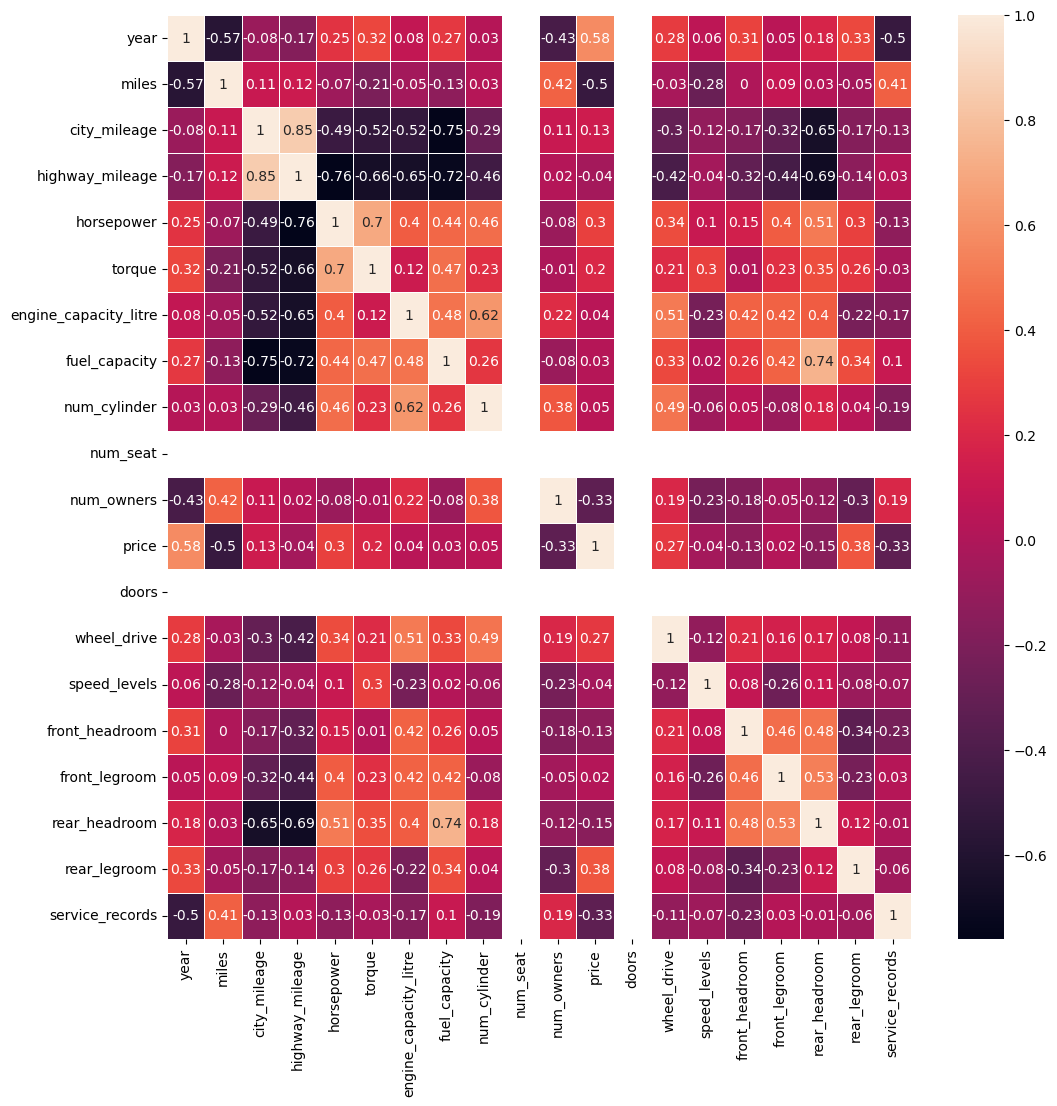

In [12]:
# Gráfico mapa de calor para avaliar relações entre price e os outros atributos
correlation_matrix = df_cars_copia.corr(numeric_only=True).round(2)

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

### Observando a correlação do preço pelos os outros atributos vaemos que naõ temos um correlação muito forte só temos um correlação fraca negatova e moderada positiva.

**Então para fins educativos irei utilizar os atributos year, miles, num_owners, horsepower, rear_legroom, service_records, para prosseguirmos com nossa análises esse atributos serão relacionados com o preço**  

# Análise com gráficos

In [14]:
df_cars_copia

,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,...,type,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
0,Chevrolet,Volt LT,2019,27173,43,42,149,294,1.5,8.9,...,sedan,4,2,hybrid_gas_electric,6.0,37.8,42.1,35.8,34.7,4
1,Hyundai,Elantra SE,2017,76941,29,38,146,132,2.0,14.0,...,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,16
2,Ford,Focus,2014,97027,27,37,159,146,2.0,12.4,...,sedan,4,2,gas,6.0,38.3,43.7,38.0,33.2,13
3,Honda,Civic,2016,95396,31,42,158,138,1.5,12.4,...,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,26
4,Hyundai,Elantra SE,2019,28405,29,38,147,132,2.0,14.0,...,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,5
5,Honda,Civic,2016,61459,31,41,158,138,2.0,12.4,...,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,13
6,Subaru,Legacy,2022,6811,27,35,182,176,2.5,18.5,...,sedan,4,4,gas,6.0,39.4,42.8,37.2,39.5,6
7,Honda,Clarity,2018,29674,44,40,212,99,1.5,7.0,...,sedan,4,2,hybrid_gas_electric,6.0,39.1,42.2,37.1,36.2,2
8,Volkswagen,Jetta,2019,25044,30,40,147,184,1.4,13.2,...,sedan,4,2,gas,8.0,38.5,41.1,37.2,37.4,6
9,Volkswagen,Jetta,2017,26215,28,38,150,184,1.4,14.5,...,sedan,4,2,gas,6.0,38.2,41.2,37.1,38.1,13


In [93]:
media_preco_ano = df_cars_copia.groupby(['year','brand','model'])['price'].mean().reset_index()
media_preco_ano.sort_values(['brand', 'year'])

,year,brand,model,price
7,2018,Chevrolet,Malibu,23570.000000
12,2019,Chevrolet,Malibu,18949.000000
13,2019,Chevrolet,Volt LT,25655.000000
0,2014,Ford,Focus,13590.000000
14,2019,Ford,Fusion,21591.000000
15,2019,Ford,Taurus,22993.000000
22,2020,Ford,Fusion,20347.500000
1,2015,Honda,Civic,19450.000000
2,2016,Honda,Civic,19433.500000
3,2017,Honda,Civic,22995.000000


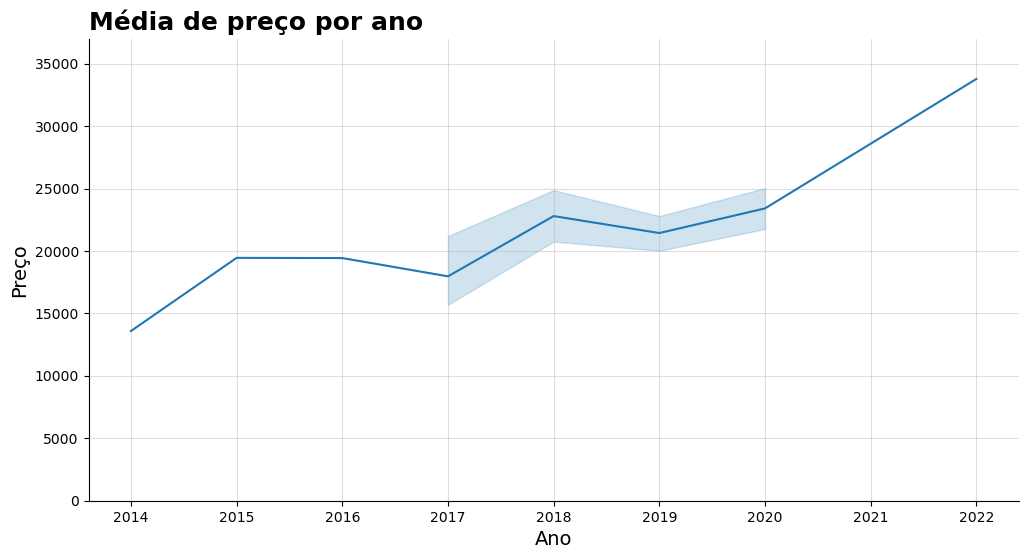

In [143]:
plt.figure(figsize=(12,6))

sns.lineplot(data=media_preco_ano, x='year', y='price', markers='o')
plt.title('Média de preço por ano', loc='left', fontsize=18, fontweight= 'bold')
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Preço', fontsize=14)
plt.ylim(0,37000)
plt.grid(alpha=0.4)
sns.despine()
plt.show()

### A média de preõ por ano nos mostra que no contexto da análise referente ao ano, marca e modelo o preço venho em uma ascendente, considerando todas as marcas, ano e modelo.

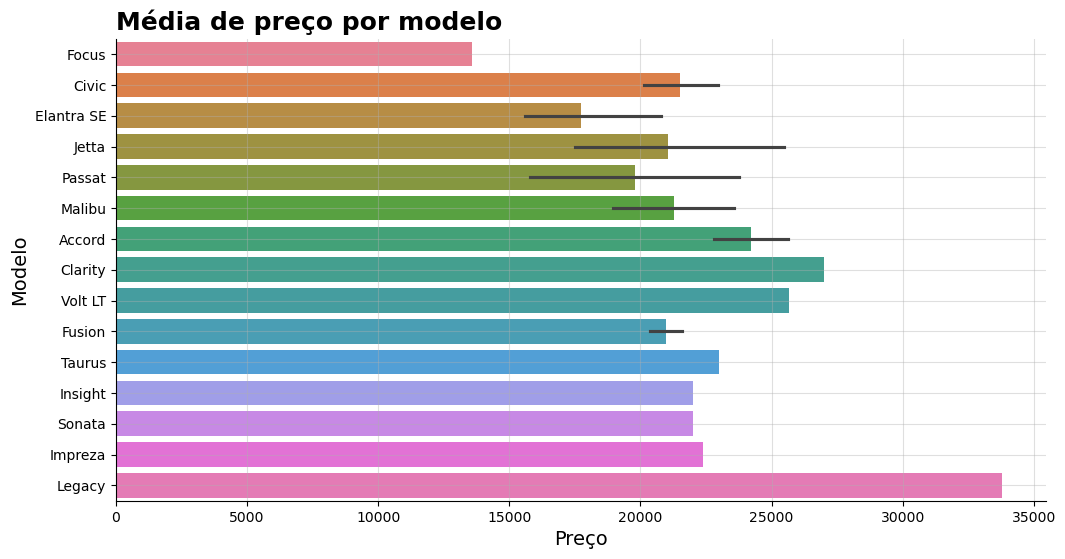

In [181]:
plt.figure(figsize=(12,6))

sns.barplot(data=media_preco_ano, x='price', y='model', hue='model')
plt.title('Média de preço por modelo', loc='left', fontsize=18, fontweight= 'bold')
plt.xlabel('Preço', fontsize=14)
plt.ylabel('Modelo', fontsize=14)
#plt.ylim(0,37000)
plt.grid(alpha=0.4)
sns.despine()
plt.show()

In [184]:
media_preco_ano[media_preco_ano['brand'] == 'Chevrolet']

,year,brand,model,price
7,2018,Chevrolet,Malibu,23570.0
12,2019,Chevrolet,Malibu,18949.0
13,2019,Chevrolet,Volt LT,25655.0


## Gráficos das Váriações de Marca por Ano

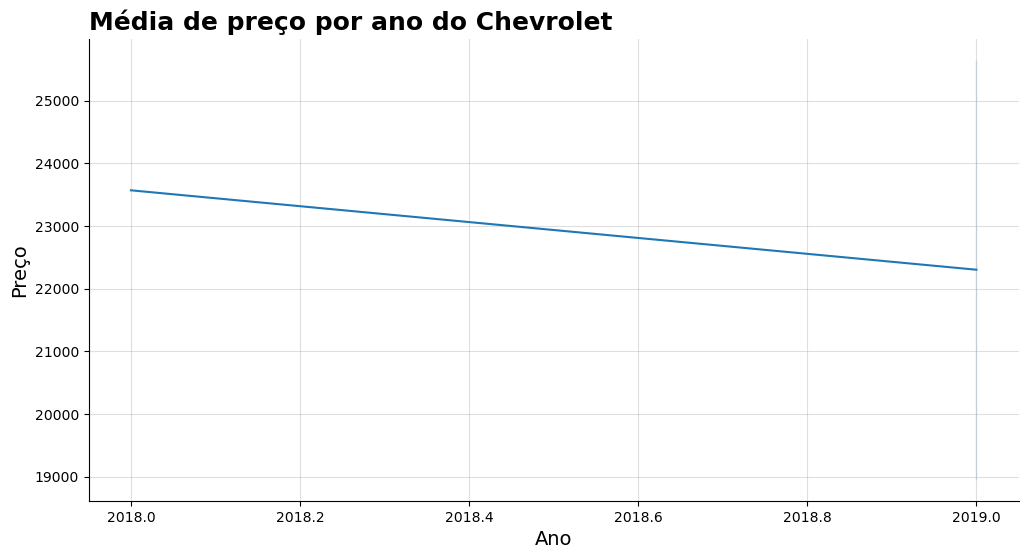

In [197]:
# Chevrolet
plt.figure(figsize=(12,6))

sns.lineplot(data=media_preco_ano[media_preco_ano['brand'] == 'Chevrolet'], x='year', y='price')
plt.title('Média de preço por ano do Chevrolet', loc='left', fontsize=18, fontweight= 'bold')
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Preço', fontsize=14)
#plt.ylim(0,37000)
plt.grid(alpha=0.4)
sns.despine()
plt.show()

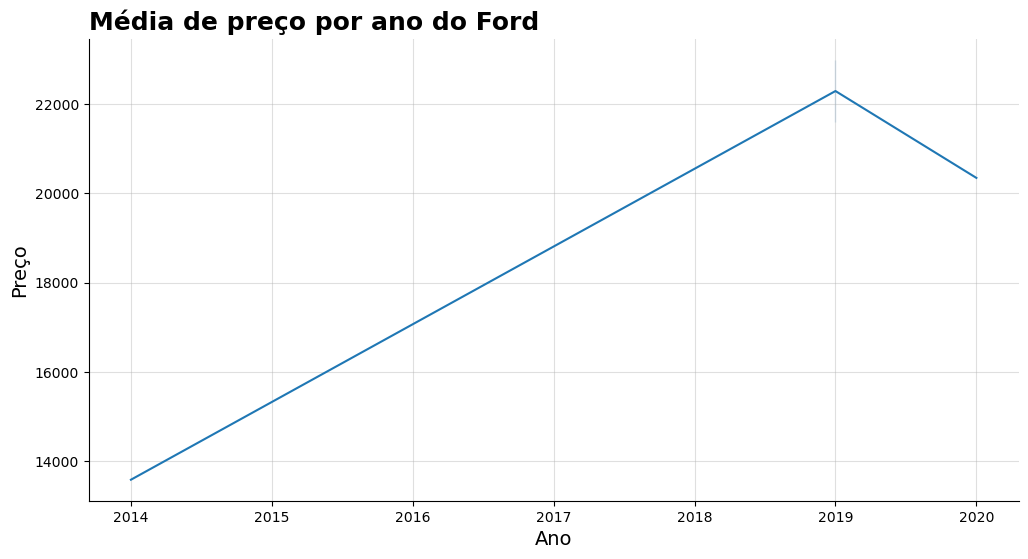

In [198]:
# Ford
plt.figure(figsize=(12,6))

sns.lineplot(data=media_preco_ano[media_preco_ano['brand'] == 'Ford'], x='year', y='price')
plt.title('Média de preço por ano do Ford', loc='left', fontsize=18, fontweight= 'bold')
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Preço', fontsize=14)
#plt.ylim(0,37000)
plt.grid(alpha=0.4)
sns.despine()
plt.show()

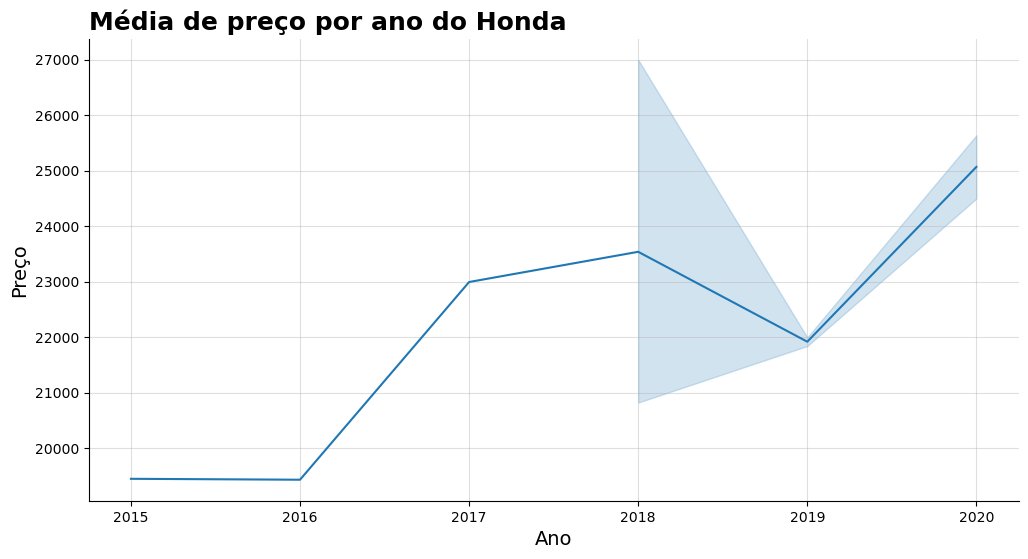

In [192]:
#Honda
plt.figure(figsize=(12,6))

sns.lineplot(data=media_preco_ano[media_preco_ano['brand'] == 'Honda'], x='year', y='price')
plt.title('Média de preço por ano do Honda', loc='left', fontsize=18, fontweight= 'bold')
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Preço', fontsize=14)
#plt.ylim(0,37000)
plt.grid(alpha=0.4)
sns.despine()
plt.show()

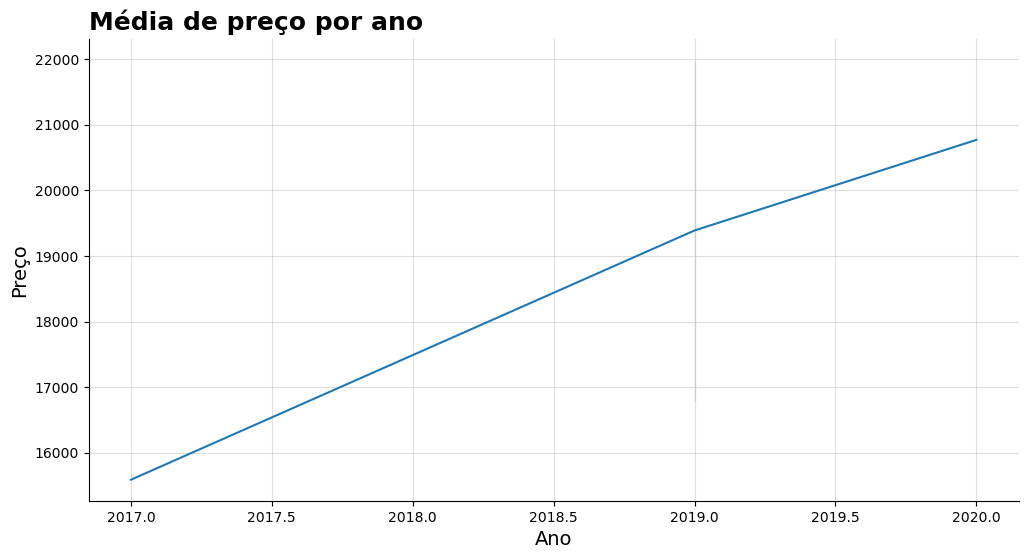

In [193]:
# Hyundai
plt.figure(figsize=(12,6))

sns.lineplot(data=media_preco_ano[media_preco_ano['brand'] == 'Hyundai'], x='year', y='price')
plt.title('Média de preço por ano', loc='left', fontsize=18, fontweight= 'bold')
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Preço', fontsize=14)
#plt.ylim(0,37000)
plt.grid(alpha=0.4)
sns.despine()
plt.show()

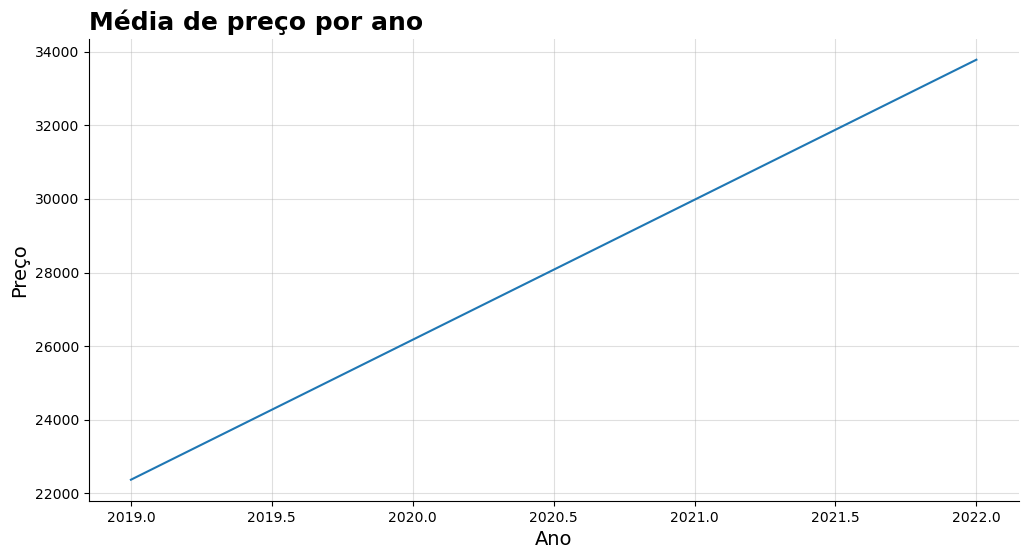

In [196]:
# Subaru

plt.figure(figsize=(12,6))

sns.lineplot(data=media_preco_ano[media_preco_ano['brand'] == 'Subaru'], x='year', y='price')
plt.title('Média de preço por ano', loc='left', fontsize=18, fontweight= 'bold')
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Preço', fontsize=14)
#plt.ylim(0,37000)
plt.grid(alpha=0.4)
sns.despine()
plt.show()

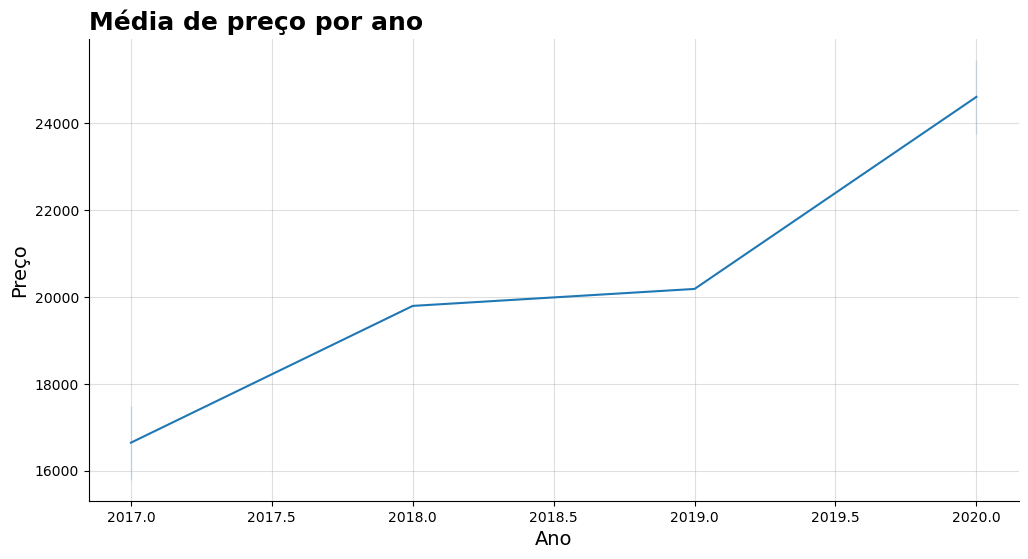

In [195]:
# Volkswagen

plt.figure(figsize=(12,6))

sns.lineplot(data=media_preco_ano[media_preco_ano['brand'] == 'Volkswagen'], x='year', y='price')
plt.title('Média de preço por ano', loc='left', fontsize=18, fontweight= 'bold')
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Preço', fontsize=14)
#plt.ylim(0,37000)
plt.grid(alpha=0.4)
sns.despine()
plt.show()

### Observamos que a única marca que teve um queda no preço durantes os anos análisados foi a Chevrolet, o restante manteve o padrão de quanto mais novo maior o preço do veiculo.

## Análise distributiva

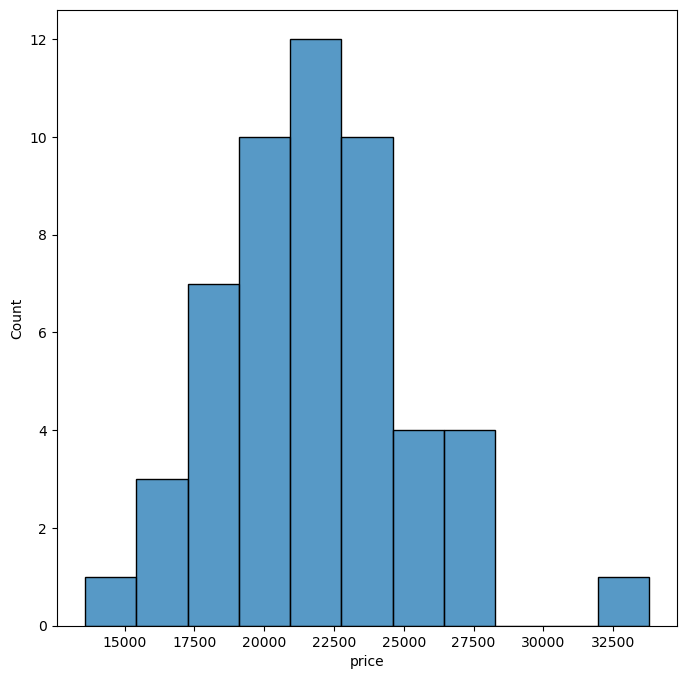

In [199]:
# Preço temos uma distribuição aparentemente normal
plt.figure(figsize=(8,8))

sns.histplot(data=df_cars_copia, x='price')
plt.show()

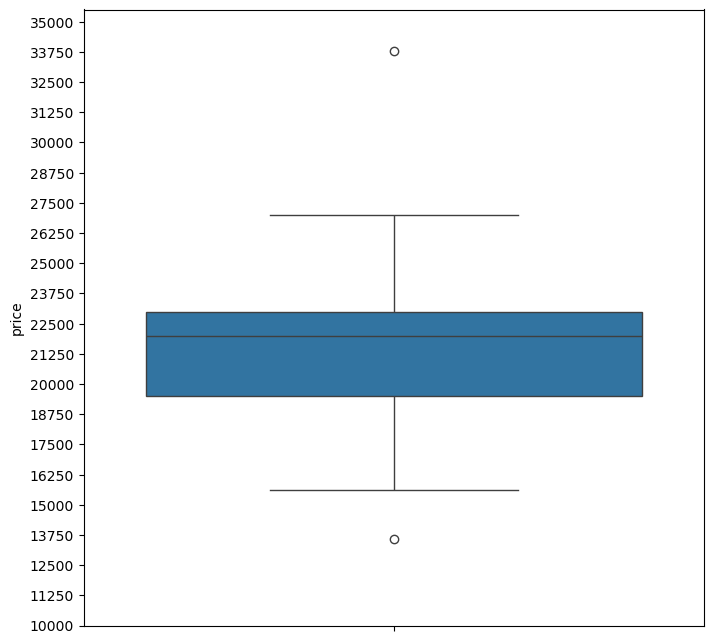

In [122]:
# Preço
plt.figure(figsize=(8,8))

sns.boxplot(data=df_cars_copia, y='price')
plt.ylim(10000,35500)
plt.yticks(np.arange(10000,35500, step=1250))
#plt.grid(alpha=0.7)
plt.show()

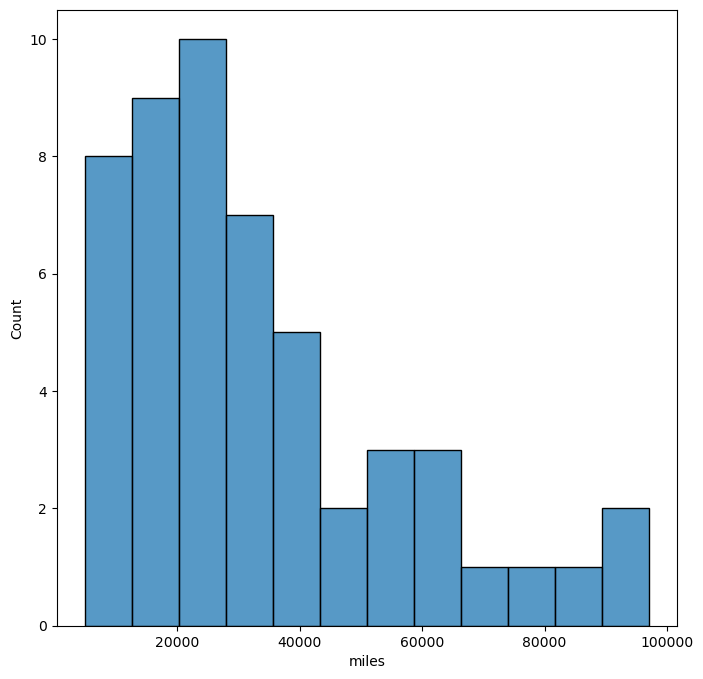

In [200]:
# Milhas temos um distribuição aparentemente assimetrica a esquerda
plt.figure(figsize=(8,8))

sns.histplot(data=df_cars_copia, x='miles', bins=12)
plt.show()

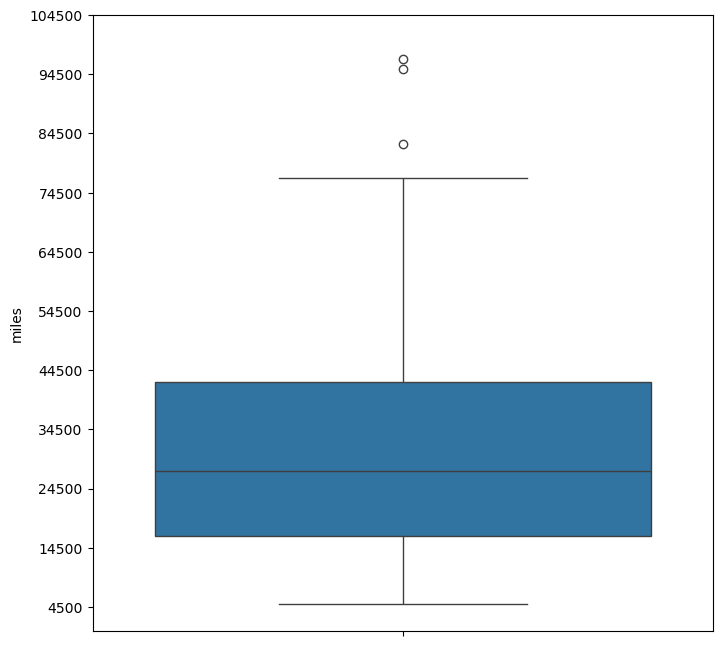

In [170]:
# Milhas

plt.figure(figsize=(8,8))

sns.boxplot(data=df_cars_copia, y='miles')
max_price = round(df_cars_copia['miles'].values.max(), 2)
min_price = round(df_cars_copia['miles'].values.min(), 2)
max_price = max_price + (max_price * 0.1)
min_price = min_price - (min_price * 0.1)

#plt.ylim(min_price,max_price)
plt.yticks(np.arange(min_price,max_price, step=10000))
#plt.grid(alpha=0.7)
plt.show()

## Faremos as Relações do Preço pelos atributos abaixo:

**year**  
**miles**  
**num_owners**  
**horsepower**  
**rear_legroom**  
**service_records**  

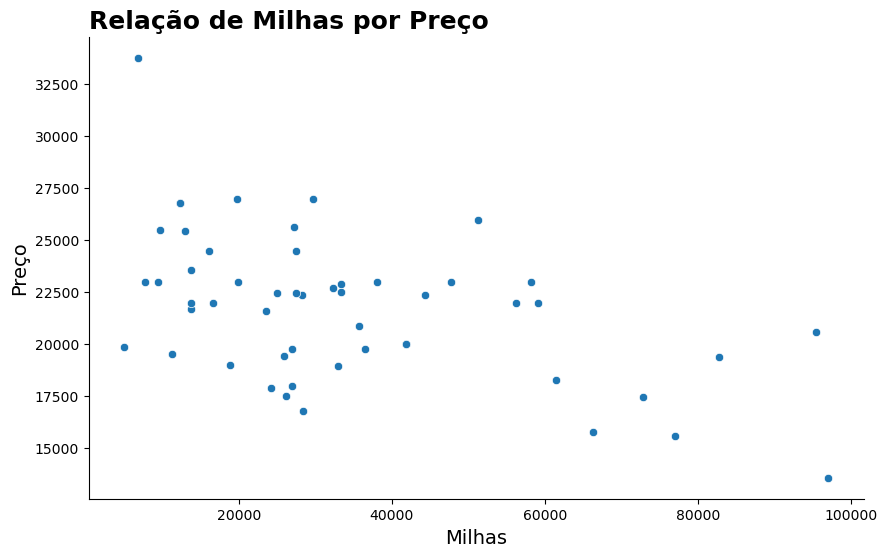

In [ ]:
# Correlação de Milhas por Preço

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cars_copia, x='miles', y='price')
plt.title('Relação de Milhas por Preço', fontsize=18, fontweight='bold', loc='left')
plt.xlabel('Milhas', fontsize=14)
plt.ylabel('Preço', fontsize=14)
sns.despine()
plt.show()

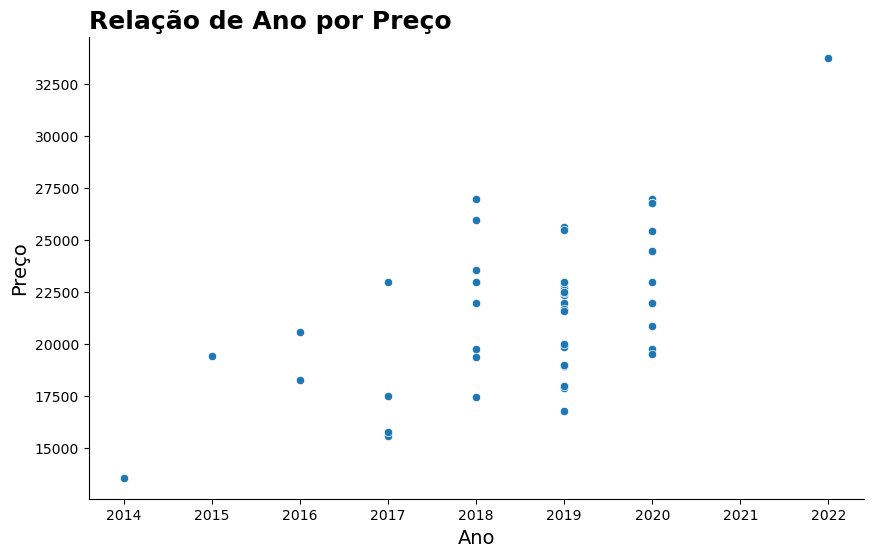

In [ ]:
# Correlação de Ano por Preço

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cars_copia, x='year', y='price')
plt.title('Relação de Ano por Preço', fontsize=18, fontweight='bold', loc='left')
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Preço', fontsize=14)
sns.despine()
plt.show()

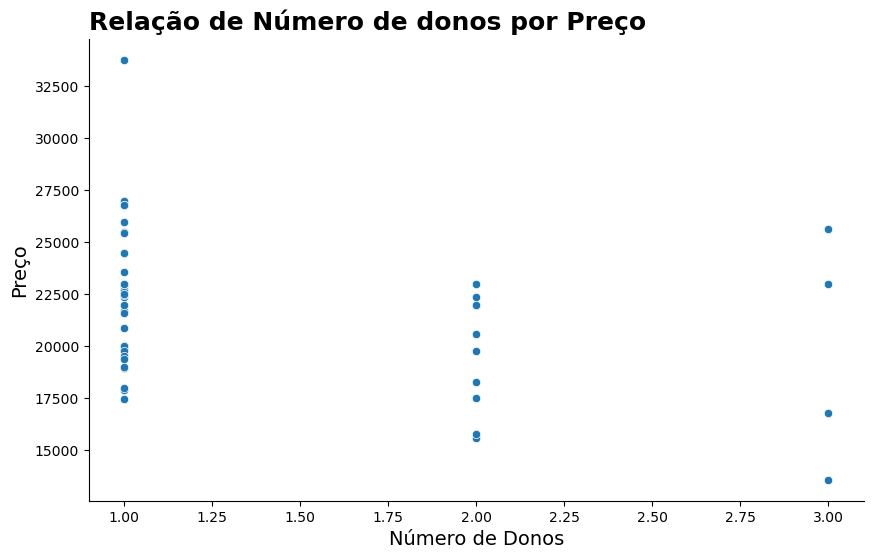

In [201]:
# Correlação de Número de donos por Preço

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cars_copia, x='num_owners', y='price')
plt.title('Relação de Número de donos por Preço', fontsize=18, fontweight='bold', loc='left')
plt.xlabel('Número de Donos', fontsize=14)
plt.ylabel('Preço', fontsize=14)
sns.despine()
plt.show()

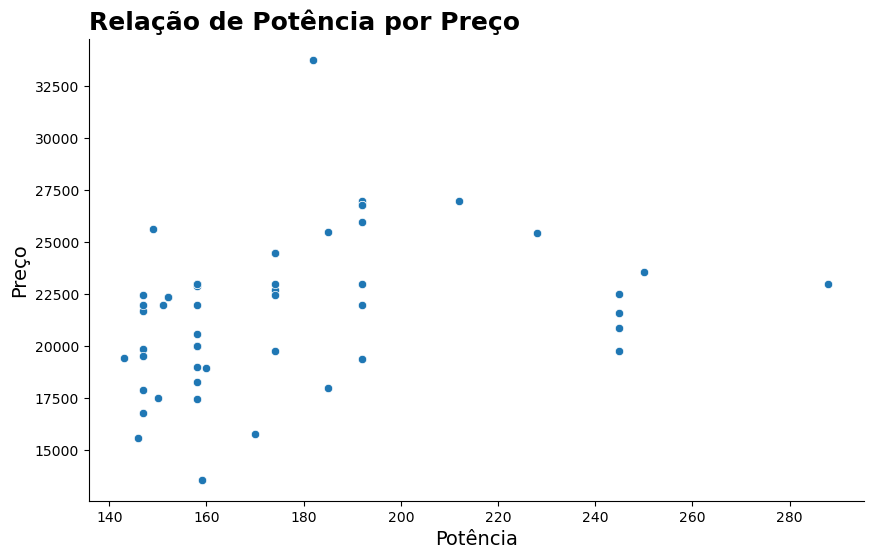

In [148]:
# Correlação de Potência por Preço

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cars_copia, x='horsepower', y='price')
plt.title('Relação de Potência por Preço', fontsize=18, fontweight='bold', loc='left')
plt.xlabel('Potência', fontsize=14)
plt.ylabel('Preço', fontsize=14)
sns.despine()
plt.show()

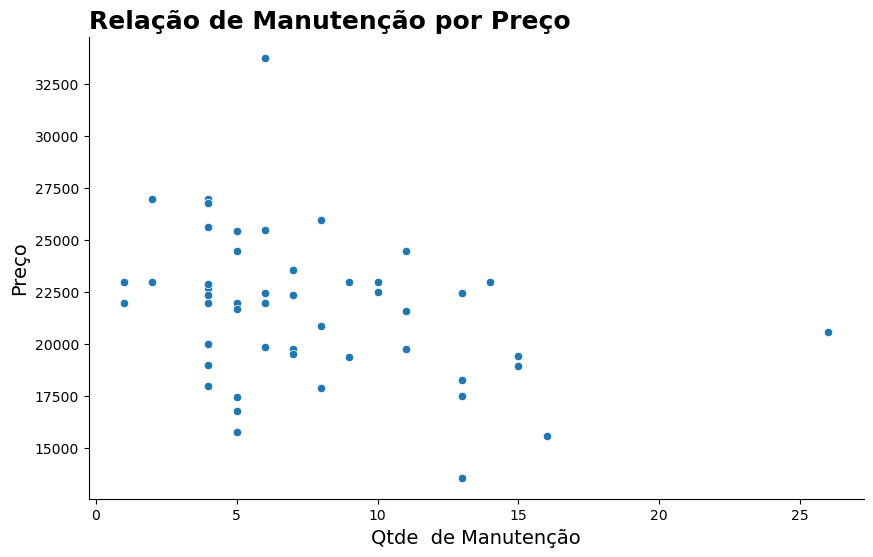

In [203]:
# Correlação de Manutenção por Preço

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cars_copia, x='service_records', y='price')
plt.title('Relação de Manutenção por Preço', fontsize=18, fontweight='bold', loc='left')
plt.xlabel('Qtde  de Manutenção', fontsize=14)
plt.ylabel('Preço', fontsize=14)
sns.despine()
plt.show()

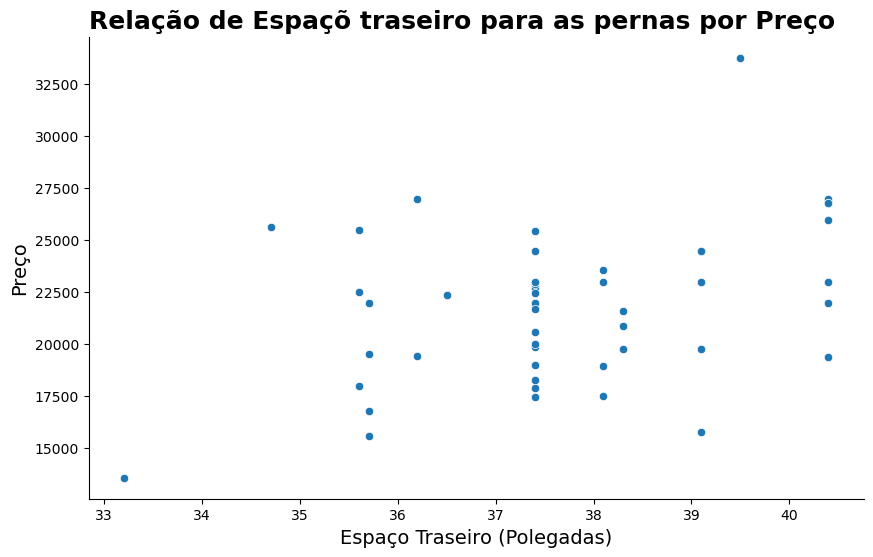

In [202]:
# Correlação de Espaço traseiro para pernas por Preço

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cars_copia, x='rear_legroom', y='price')
plt.title('Relação de Espaçõ traseiro para as pernas por Preço', fontsize=18, fontweight='bold', loc='left')
plt.xlabel('Espaço Traseiro (Polegadas)', fontsize=14)
plt.ylabel('Preço', fontsize=14)
sns.despine()
plt.show()

# Trabalhando na mineração dos dados para criação dos nossos modelos

## Temos o intuito de buscar predições de preço com referências nos atributos selecionados para possivel aumento do price nos veiculos.

**Caracteristicas que vamos trabalhar:** 

**year**  
**miles**  
**num_owners**  
**horsepower**  
**rear_legroom**  
**service_records**

In [205]:
df_modelo = df_cars_copia[['year', 'miles', 'horsepower', 'rear_legroom', 'service_records', 'num_owners', 'price']]
df_modelo

,year,miles,horsepower,rear_legroom,service_records,num_owners,price
0,2019,27173,149,34.7,4,3,25655.0
1,2017,76941,146,35.7,16,2,15590.0
2,2014,97027,159,33.2,13,3,13590.0
3,2016,95396,158,37.4,26,2,20590.0
4,2019,28405,147,35.7,5,3,16787.0
5,2016,61459,158,37.4,13,2,18277.0
6,2022,6811,182,39.5,6,1,33777.0
7,2018,29674,212,36.2,2,1,26999.0
8,2019,25044,147,37.4,6,1,22491.0
9,2017,26215,150,38.1,13,2,17500.0


In [206]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             52 non-null     int64  
 1   miles            52 non-null     int64  
 2   horsepower       52 non-null     int64  
 3   rear_legroom     52 non-null     float64
 4   service_records  52 non-null     int64  
 5   num_owners       52 non-null     int64  
 6   price            52 non-null     float64
dtypes: float64(2), int64(5)
memory usage: 3.0 KB


In [207]:
df_modelo.describe()

,year,miles,horsepower,rear_legroom,service_records,num_owners,price
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,2018.673077,33901.250000,176.865385,37.632692,7.326923,1.346154,21763.423077
std,1.396370,22700.646139,33.793507,1.604249,4.714272,0.622601,3532.455322
min,2014.000000,5000.000000,143.000000,33.200000,1.000000,1.000000,13590.000000
25%,2018.000000,16454.750000,152.000000,37.175000,4.000000,1.000000,19519.000000
50%,2019.000000,27448.500000,159.500000,37.400000,6.000000,1.000000,21998.500000
75%,2019.250000,42442.000000,192.000000,38.300000,10.000000,2.000000,22996.000000
max,2022.000000,97027.000000,288.000000,40.400000,26.000000,3.000000,33777.000000


In [215]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree  import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesClassifier, RandomForestRegressor
from yellowbrick.classifier import ConfusionMatrix

In [213]:
# Separando os dados para criação dos modelos
previsores = df_modelo[['year', 'miles', 'horsepower', 'rear_legroom', 'service_records', 'num_owners']].values
classe = df_modelo['price'].values

In [214]:
# Dividindo dados de treino e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size=0.3,
                                                                  random_state=500)
X_teste

array([[2.0180e+03, 1.9950e+04, 1.5800e+02, 3.7400e+01, 9.0000e+00,
        1.0000e+00],
       [2.0190e+03, 1.3721e+04, 1.4700e+02, 3.7400e+01, 5.0000e+00,
        1.0000e+00],
       [2.0180e+03, 1.3726e+04, 2.5000e+02, 3.8100e+01, 7.0000e+00,
        1.0000e+00],
       [2.0180e+03, 7.2827e+04, 1.5800e+02, 3.7400e+01, 5.0000e+00,
        1.0000e+00],
       [2.0170e+03, 6.6329e+04, 1.7000e+02, 3.9100e+01, 5.0000e+00,
        2.0000e+00],
       [2.0200e+03, 5.9090e+04, 1.9200e+02, 4.0400e+01, 1.0000e+00,
        1.0000e+00],
       [2.0190e+03, 3.3412e+04, 2.4500e+02, 3.5600e+01, 1.0000e+01,
        1.0000e+00],
       [2.0180e+03, 8.2729e+04, 1.9200e+02, 4.0400e+01, 9.0000e+00,
        1.0000e+00],
       [2.0190e+03, 4.1799e+04, 1.5800e+02, 3.7400e+01, 4.0000e+00,
        1.0000e+00],
       [2.0190e+03, 2.8405e+04, 1.4700e+02, 3.5700e+01, 5.0000e+00,
        3.0000e+00],
       [2.0190e+03, 2.7173e+04, 1.4900e+02, 3.4700e+01, 4.0000e+00,
        3.0000e+00],
       [2.0200e+03, 1